##LSTM

### 運用pandas datareader 讀取資料

In [5]:
import pandas_datareader
df = pandas_datareader.get_data_yahoo('2330.TW', start = '2000-01-01')

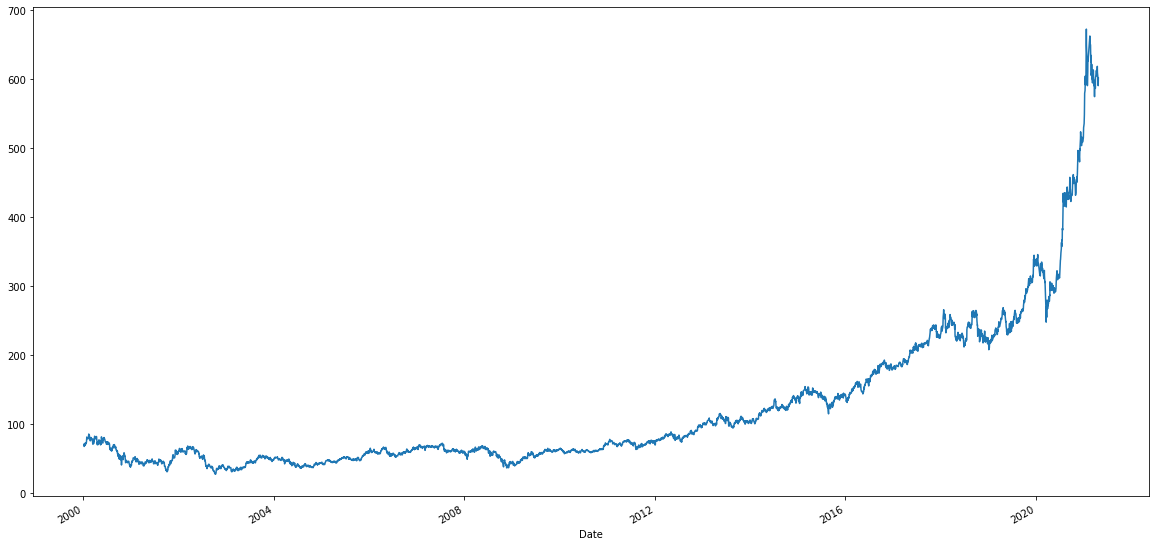

In [6]:
df['Close'].plot(kind = 'line', figsize = [20,10])

In [7]:
dataset = df[['Close']].values

In [8]:
dataset

array([[ 69.64903259],
       [ 71.21404266],
       [ 69.64903259],
       ...,
       [592.        ],
       [591.        ],
       [602.        ]])

### 資料標準化

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled  = sc.fit_transform(dataset)

In [13]:
dataset_scaled

array([[0.06535691],
       [0.06778124],
       [0.06535691],
       ...,
       [0.87452396],
       [0.87297487],
       [0.89001483]])

### 將資料區分為訓練與測試資料集

In [19]:
dataset_scaled.shape

(5325, 1)

In [20]:
5325 * 0.8

4260.0

In [29]:
import numpy as np
X_train = []
y_train = []
for i in range(60,4000):
  X_train.append(dataset_scaled[i-60:i ,0 ])
  y_train.append(dataset_scaled[i   ,0])

In [30]:
len(X_train), len(y_train)

(3940, 3940)

In [31]:
X_test = []
y_test = []

for i in range(4000 - 60,len(dataset_scaled)):
  X_test.append(dataset_scaled[i-60:i,0])
  y_test.append(dataset_scaled[i,0])

In [32]:
len(X_test), len(y_test)

(1385, 1385)

In [33]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

In [34]:
X_train.shape, X_test.shape

((3940, 60), (1385, 60))

### 運用機器學習建立模型 (選項)

In [35]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
pred_y = clf.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_test, pred_y)

0.06111056562243642

In [41]:
r2_score(y_test, pred_y)

-0.9403733798194454

### ===========================================

In [27]:
X_train  = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [28]:
# (資料筆數, 時間區間, 維度)
X_train.shape, X_test.shape

((3940, 60, 1), (1385, 60, 1))